### 逻辑回归手动调参实验

In [68]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

# Scikit-Learn相关模块
# 评估器类
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# 实用函数
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### 数据准备与评估器构造

##### 1、数据准备

In [69]:
np.random.seed(24)
X = np.random.normal(0, 1, size=(1000, 2))
y = np.array(X[:,0]+X[:, 1]**2 < 1.5, int)

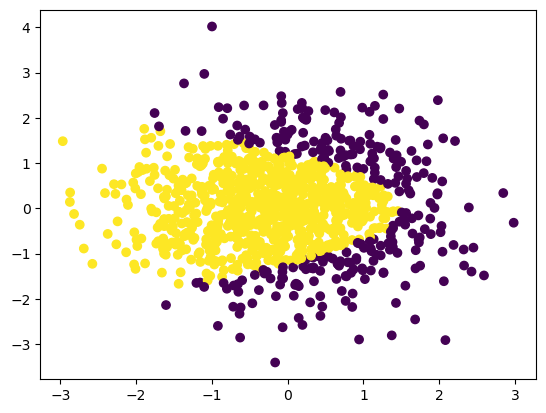

In [70]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [71]:
np.random.seed(24)
for i in range(200):
    y[np.random.randint(1000)] = 1
    y[np.random.randint(1000)] = 0

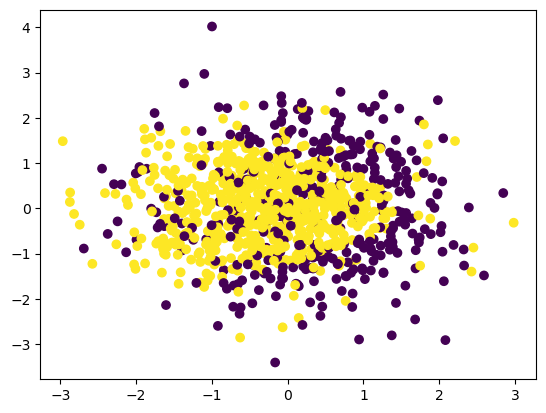

In [72]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

##### 2、构建机器学习流

In [74]:
def plr(degree=1, penalty=None, C=1.0):
    pipe = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                        StandardScaler(),
                        LogisticRegression(penalty=penalty, tol=1e-8, C=C, max_iter=int(1e6)))
    return pipe

#### 评估器训练与过拟合实验

##### 1、更多参数查看和修改方法

In [75]:
pl1 = plr()
pl1.get_params()

{'memory': None,
 'steps': [('polynomialfeatures',
   PolynomialFeatures(degree=1, include_bias=False)),
  ('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(max_iter=1000000, penalty=None, tol=1e-08))],
 'transform_input': None,
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=1, include_bias=False),
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(max_iter=1000000, penalty=None, tol=1e-08),
 'polynomialfeatures__degree': 1,
 'polynomialfeatures__include_bias': False,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression

In [76]:
pl1.get_params()['polynomialfeatures__include_bias']

False

In [77]:
# 调整PolynomialFeatures评估器中的include_bias参数
pl1.set_params(polynomialfeatures__include_bias=True)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,1
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [78]:
pl1.get_params()['polynomialfeatures__include_bias']

True

##### 2、建模结果观察与决策边界函数

In [79]:
pr1 = plr()
pr1.fit(X_train, y_train)
pr1.score(X_train, y_train),pr1.score(X_test, y_test)

(0.6985714285714286, 0.7066666666666667)

In [80]:
def plot_decision_boundary(X, y, model):
    """
    决策边界绘制函数
    """

    # 以两个特征的极值+1/-1作为边界，并在其中添加1000个点
    x1, x2 = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 1000).reshape(-1,1),
                        np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 1000).reshape(-1,1))

    # 将所有点的横纵坐标转化成二维数组
    X_temp = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1)], 1)

    # 对所有点进行模型类别预测
    yhat_temp = model.predict(X_temp)
    yhat = yhat_temp.reshape(x1.shape)

    # 绘制决策边界图像
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#90CAF9'])
    plt.contourf(x1, x2, yhat, cmap=custom_cmap)
    plt.scatter(X[(y == 0).flatten(), 0], X[(y == 0).flatten(), 1], color='red')
    plt.scatter(X[(y == 1).flatten(), 0], X[(y == 1).flatten(), 1], color='blue')

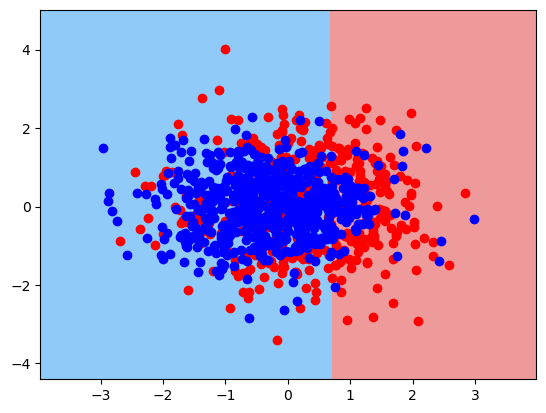

In [81]:
# 测试函数性能
plot_decision_boundary(X, y, pr1)

In [82]:
def plot_decision_boundary_sklearn(X, y, model):
    """
    决策边界绘制函数(sklearn)
    """
    from sklearn.inspection import DecisionBoundaryDisplay
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#90CAF9'])
    DecisionBoundaryDisplay.from_estimator(
        model, X, response_method="predict", cmap=custom_cmap)
    plt.scatter(X[(y == 0).flatten(), 0], X[(y == 0).flatten(), 1], color='red')
    plt.scatter(X[(y == 1).flatten(), 0], X[(y == 1).flatten(), 1], color='blue')
    plt.show()

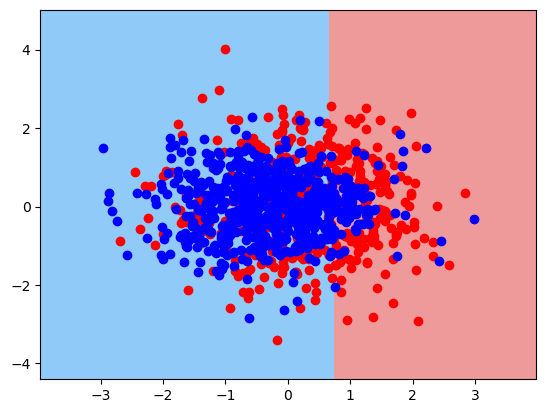

In [83]:
plot_decision_boundary_sklearn(X, y, pr1)

In [84]:
pr2 = plr(degree=2)
pr2.fit(X_train, y_train)
pr2.score(X_train, y_train), pr2.score(X_test, y_test)

(0.7914285714285715, 0.7866666666666666)

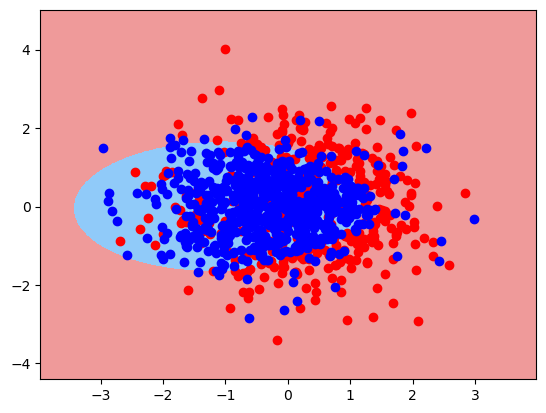

In [85]:
plot_decision_boundary(X, y, pr2)

In [86]:
pr2.named_steps

{'polynomialfeatures': PolynomialFeatures(include_bias=False),
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(max_iter=1000000, penalty=None, tol=1e-08)}

In [87]:
pr2.named_steps['logisticregression'].coef_

array([[-0.81012936,  0.04384633, -0.48582911,  0.02977567, -1.1235261 ]])

##### 3、过拟合倾向实验

In [127]:
pr3 = plr(degree=12)
pr3.fit(X_train, y_train)
pr3.score(X_train, y_train), pr3.score(X_test, y_test)

/opt/anaconda3/envs/mllearn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 13986 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8385714285714285, 0.79)

In [133]:
pr3 = plr(degree=12)
pr3.set_params(logisticregression__tol=1e-3)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,12
,interaction_only,False
,include_bias,False
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [134]:
pr3.fit(X_train, y_train)
pr3.score(X_train, y_train), pr3.score(X_test, y_test)

(0.8285714285714286, 0.78)

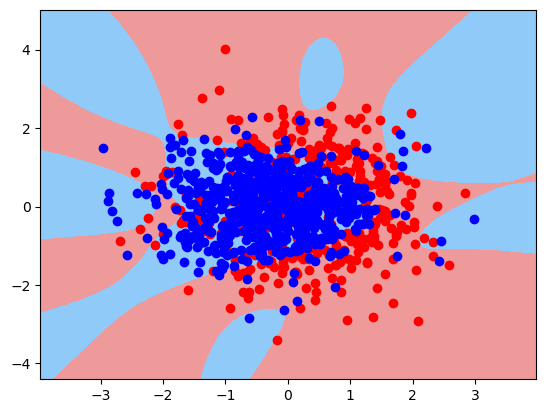

In [136]:
plot_decision_boundary(X, y, pr3)

In [119]:
# 用于存储不同模型训练准确率与测试准确率的列表
score_l = []

# 实例化多组模型，测试模型效果
for degree in range(1, 21):
    pr_temp = plr(degree=degree)
    pr_temp.fit(X_train, y_train)
    score_temp = [pr_temp.score(X_train, y_train),pr_temp.score(X_test, y_test)]
    score_l.append(score_temp)

/opt/anaconda3/envs/mllearn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 14120 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/mllearn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 14101 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [102]:
np.array(score_l)

array([[0.69857143, 0.70666667],
       [0.79142857, 0.78666667],
       [0.79428571, 0.78666667],
       [0.79428571, 0.78333333],
       [0.79428571, 0.77666667],
       [0.80285714, 0.79      ],
       [0.79857143, 0.78333333],
       [0.83142857, 0.77      ],
       [0.82857143, 0.77666667],
       [0.83142857, 0.78333333],
       [0.83857143, 0.78      ],
       [0.83857143, 0.79      ],
       [0.84285714, 0.78666667],
       [0.84428571, 0.79      ],
       [0.84571429, 0.79333333],
       [0.84857143, 0.79333333],
       [0.84857143, 0.79666667],
       [0.84857143, 0.79      ],
       [0.84857143, 0.78666667],
       [0.85      , 0.79      ]])

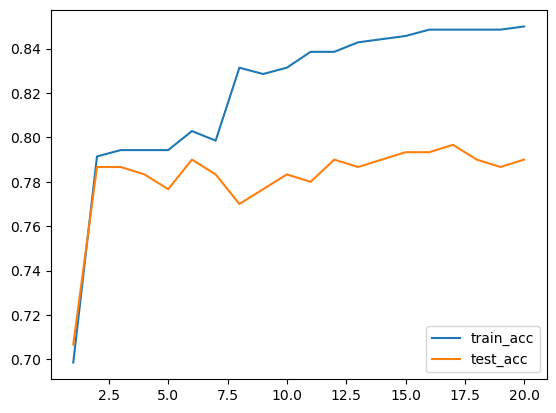

In [120]:
plt.plot(list(range(1, 21)), np.array(score_l)[:,0], label='train_acc')
plt.plot(list(range(1, 21)), np.array(score_l)[:,1], label='test_acc')
plt.legend(loc = 4)

#### 评估器的手动调参

##### 1、验证正则化对过拟合的抑制效果

In [137]:
# 测试l1正则化
pl1 = plr(degree=12, penalty='l1', C=1.0)

In [138]:
pl1.fit(X_train, y_train)

ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.

In [139]:
pl1.set_params(logisticregression__solver='liblinear')

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,12
,interaction_only,False
,include_bias,False
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [140]:
pl1.fit(X_train, y_train)
pl1.score(X_train, y_train), pl1.score(X_test, y_test)

(0.7957142857142857, 0.7833333333333333)

In [141]:
# 测试l2正则化
pl2 = plr(degree=12, penalty='l2', C=1.0).fit(X_train, y_train)
pl2.score(X_train, y_train),pl2.score(X_test, y_test)

(0.8071428571428572, 0.7933333333333333)

In [142]:
pr3.score(X_train, y_train),pr3.score(X_test, y_test)

(0.8285714285714286, 0.78)

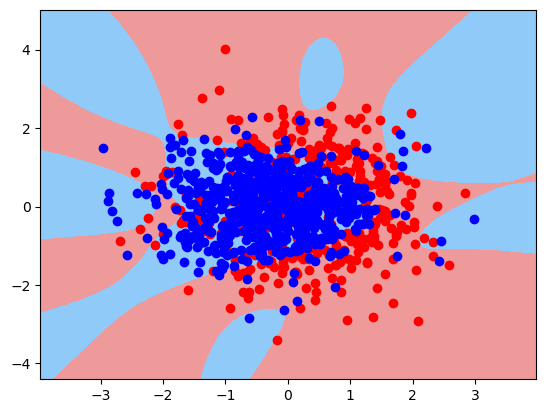

In [143]:
plot_decision_boundary(X, y, pr3)

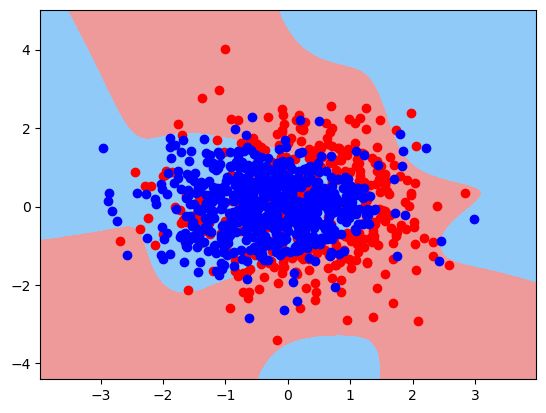

In [ ]:
plot_decision_boundary(X, y, pl1)

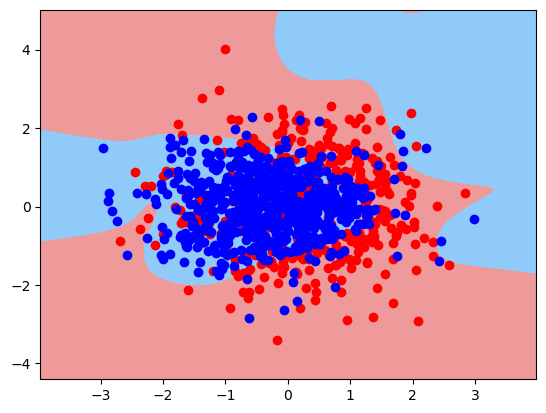

In [ ]:
plot_decision_boundary(X, y, pl2)

##### 2、l1正则化下最有特征衍生阶数

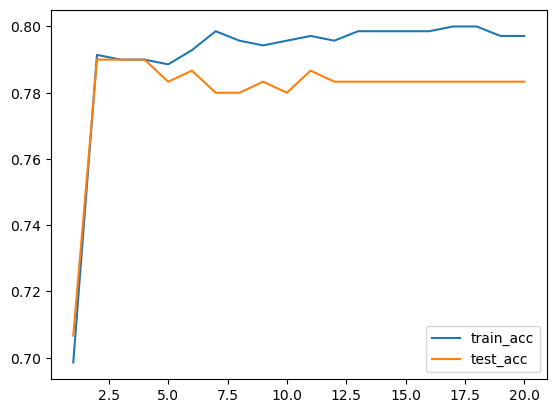

In [ ]:
# 用于存储不同模型训练准确率与测试准确率的列表
score_l1 = []

# 实例化多组模型，测试模型效果
for degree in range(1, 21):
    pr_temp = plr(degree=degree, penalty='l1')
    pr_temp.set_params(logisticregression__solver='liblinear')
    pr_temp.fit(X_train, y_train)
    score_temp = [pr_temp.score(X_train, y_train),pr_temp.score(X_test, y_test)]
    score_l1.append(score_temp)
    
# 观察最终结果
plt.plot(list(range(1, 21)), np.array(score_l1)[:,0], label='train_acc')
plt.plot(list(range(1, 21)), np.array(score_l1)[:,1], label='test_acc')
plt.legend(loc = 4)

In [ ]:
score_l1

[[0.6985714285714286, 0.7066666666666667],
 [0.7914285714285715, 0.79],
 [0.79, 0.79],
 [0.79, 0.79],
 [0.7885714285714286, 0.7833333333333333],
 [0.7928571428571428, 0.7866666666666666],
 [0.7985714285714286, 0.78],
 [0.7957142857142857, 0.78],
 [0.7942857142857143, 0.7833333333333333],
 [0.7957142857142857, 0.78],
 [0.7971428571428572, 0.7866666666666666],
 [0.7957142857142857, 0.7833333333333333],
 [0.7985714285714286, 0.7833333333333333],
 [0.7985714285714286, 0.7833333333333333],
 [0.7985714285714286, 0.7833333333333333],
 [0.7985714285714286, 0.7833333333333333],
 [0.8, 0.7833333333333333],
 [0.8, 0.7833333333333333],
 [0.7971428571428572, 0.7833333333333333],
 [0.7971428571428572, 0.7833333333333333]]

##### 3、l2正则化下最有特征衍生阶数

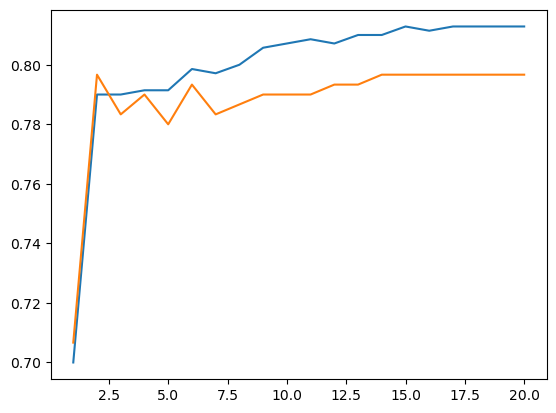

In [ ]:
# 用于存储不同模型训练准确率与测试准确率的列表
score_l2 = []

# 实例化多组模型，测试模型效果
for degree in range(1, 21):
    pr_temp = plr(degree=degree, penalty='l2')
    pr_temp.fit(X_train, y_train)
    score_temp = [pr_temp.score(X_train, y_train),pr_temp.score(X_test, y_test)]
    score_l2.append(score_temp)
    
# 观察最终结果
plt.plot(list(range(1, 21)), np.array(score_l2)[:,0], label='train_acc')
plt.plot(list(range(1, 21)), np.array(score_l2)[:,1], label='test_acc')

In [ ]:
score_l2

[[0.7, 0.7066666666666667],
 [0.79, 0.7966666666666666],
 [0.79, 0.7833333333333333],
 [0.7914285714285715, 0.79],
 [0.7914285714285715, 0.78],
 [0.7985714285714286, 0.7933333333333333],
 [0.7971428571428572, 0.7833333333333333],
 [0.8, 0.7866666666666666],
 [0.8057142857142857, 0.79],
 [0.8071428571428572, 0.79],
 [0.8085714285714286, 0.79],
 [0.8071428571428572, 0.7933333333333333],
 [0.81, 0.7933333333333333],
 [0.81, 0.7966666666666666],
 [0.8128571428571428, 0.7966666666666666],
 [0.8114285714285714, 0.7966666666666666],
 [0.8128571428571428, 0.7966666666666666],
 [0.8128571428571428, 0.7966666666666666],
 [0.8128571428571428, 0.7966666666666666],
 [0.8128571428571428, 0.7966666666666666]]

##### 4、探索C值

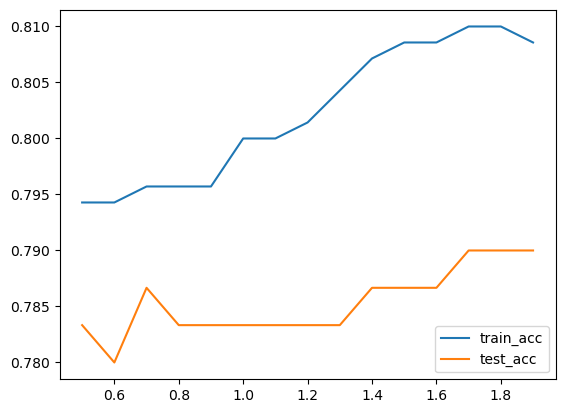

In [144]:
# 用于存储不同模型训练准确率与测试准确率的列表
score_l1_2 = []

# 实例化多组模型，测试模型效果
for C in np.arange(0.5, 2, 0.1):
    pr_temp = plr(degree=17, penalty='l1', C=C)
    pr_temp.set_params(logisticregression__solver='liblinear')
    pr_temp.fit(X_train, y_train)
    score_temp = [pr_temp.score(X_train, y_train),pr_temp.score(X_test, y_test)]
    score_l1_2.append(score_temp)
    
# 观察最终结果
plt.plot(list(np.arange(0.5, 2, 0.1)), np.array(score_l1_2)[:,0], label='train_acc')
plt.plot(list(np.arange(0.5, 2, 0.1)), np.array(score_l1_2)[:,1], label='test_acc')
plt.legend(loc = 4)

In [147]:
score_l1_2

[[0.7942857142857143, 0.7833333333333333],
 [0.7942857142857143, 0.78],
 [0.7957142857142857, 0.7866666666666666],
 [0.7957142857142857, 0.7833333333333333],
 [0.7957142857142857, 0.7833333333333333],
 [0.8, 0.7833333333333333],
 [0.8, 0.7833333333333333],
 [0.8014285714285714, 0.7833333333333333],
 [0.8042857142857143, 0.7833333333333333],
 [0.8071428571428572, 0.7866666666666666],
 [0.8085714285714286, 0.7866666666666666],
 [0.8085714285714286, 0.7866666666666666],
 [0.81, 0.79],
 [0.81, 0.79],
 [0.8085714285714286, 0.79]]

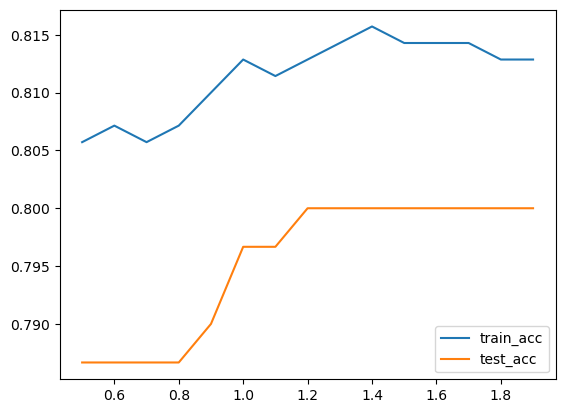

In [ ]:
# 用于存储不同模型训练准确率与测试准确率的列表
score_l2_15 = []

# 实例化多组模型，测试模型效果
for C in np.arange(0.5, 2, 0.1):
    pr_temp = plr(degree=15, penalty='l2', C=C)
    pr_temp.fit(X_train, y_train)
    score_temp = [pr_temp.score(X_train, y_train),pr_temp.score(X_test, y_test)]
    score_l2_15.append(score_temp)
    
# 观察最终结果
plt.plot(list(np.arange(0.5, 2, 0.1)), np.array(score_l2_15)[:,0], label='train_acc')
plt.plot(list(np.arange(0.5, 2, 0.1)), np.array(score_l2_15)[:,1], label='test_acc')
plt.legend(loc = 4)

In [ ]:
score_l2_15

[[0.8057142857142857, 0.7866666666666666],
 [0.8071428571428572, 0.7866666666666666],
 [0.8057142857142857, 0.7866666666666666],
 [0.8071428571428572, 0.7866666666666666],
 [0.81, 0.79],
 [0.8128571428571428, 0.7966666666666666],
 [0.8114285714285714, 0.7966666666666666],
 [0.8128571428571428, 0.8],
 [0.8142857142857143, 0.8],
 [0.8157142857142857, 0.8],
 [0.8142857142857143, 0.8],
 [0.8142857142857143, 0.8],
 [0.8142857142857143, 0.8],
 [0.8128571428571428, 0.8],
 [0.8128571428571428, 0.8]]